# Центральная предельная теорема.

Как применить законы статистики к данным ? Сколько элементов сумм использовано в коде?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

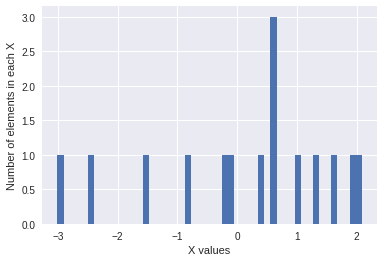

Number of sums - это количество элементов в выборке X1. На гистограмме каждый такой элемент отображён тонким прямоугольников высотой 1. Т.о. всего в выборке было 15 элементов, т.е. number of sums = 15

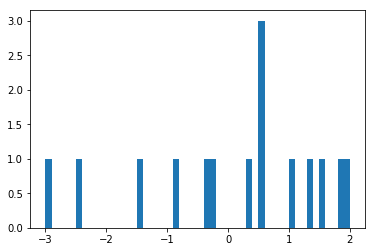

In [2]:
X1 = [-3, -2.5, -1.5, -0.8, -0.3,-0.2, 0.4, 0.5,0.5,0.5, 1,1.3, 1.6, 1.9,2]
X1 = np.array(X1).reshape(-1,1)
plt.hist(X1, 50)
plt.show()

# Матрица ковариаций

Чему равна матрица ковариаций для графика?

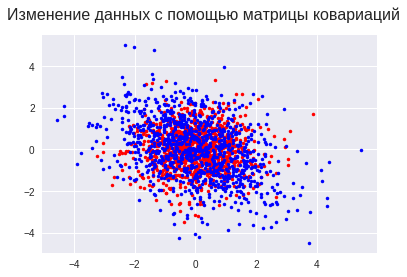

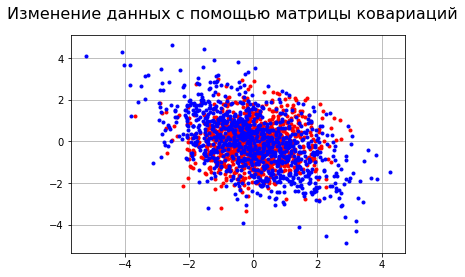

In [3]:
import numpy.linalg as la
n = 1000
C = [[2,0],[-1,2]] # найти!
A = la.cholesky(C)
X = np.random.randn(n,2)
Y = np.dot(A,X.T)

plt.suptitle('Изменение данных с помощью матрицы ковариаций', fontsize=16)  
plt.grid()
plt.plot(X[:,0], X[:,1], 'r.')
plt.plot(Y[0,:], Y[1,:], 'b.')

Точно назвать исходную матрицу нельзя, т.к. все использующиеся величины - случайные.
Но синее облако точек находится большей частью в интервале [-4,4] и вытянуто от левого верхнего края к правому нижнему.
Поэтому одна из возможный матриц ковариации:
C = [[2, 0], [-1, 2]]

# Разброс данных 2 способами: теоретически и практически
Построить преобразование с помощью вычисленной выше матрицы

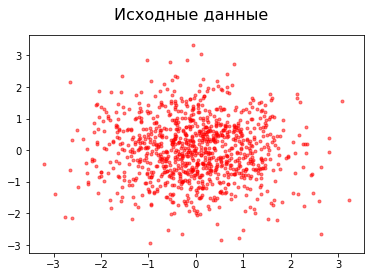

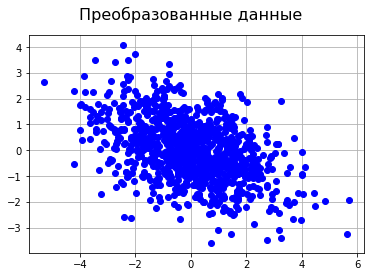

In [4]:
mu, sigma = 0, 1 # mean and standard deviation
# x = np.random.normal(mu, sigma, 100)
x = np.matrix(np.random.normal(0, 1, size=(1000, 2)))
c = [[2, 0], [-1, 2]]
a = np.linalg.cholesky(c)
y = x * a
plt.suptitle('Исходные данные', fontsize=16) 
plt.plot(x[:, 0], x[:, 1], linestyle='None', color="red", marker=".", alpha=0.5) 
plt.show()
plt.suptitle('Преобразованные данные', fontsize=16) 
plt.plot(y[:, 0], y[:, 1], linestyle='None', color="blue", marker="o", alpha=1)
plt.grid()
plt.show()

In [5]:
?sns.regplot

Object `sns.regplot` not found.


/home/egor/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


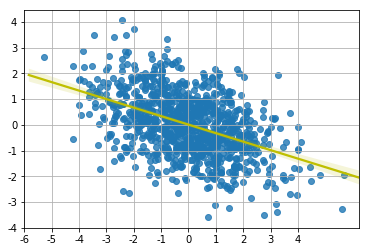

In [6]:
import seaborn as sns
sns.regplot(y[:,0].flatten().tolist()[0],y[:,1].flatten().tolist()[0], line_kws={'color':'y'})
plt.xticks(range(-6,5), range(-6,5))
plt.yticks(range(-4,5), range(-4,5))
plt.grid()

Визуально угол наклона равен примерно -0.55 радиан

In [7]:
theta = -0.55
u = np.matrix('{}; {}'.format(np.math.sin(theta), np.math.cos(theta)))
yp = y*u
var_empirical = yp.var() #?
var_theoretical = float((np.transpose(u)*c*u))
print('генерация данных: ', var_empirical)
print('теоритический подсчет: ', var_theoretical)

генерация данных:  2.5197600951622094
теоритический подсчет:  2.4456036800307177


При большом количестве данных эти показатели должны быть равны. Достаточно ли мы данных сгенерировали?

In [8]:
(var_empirical-var_theoretical)/var_theoretical

0.030322335436852265

Показатели расходятся на 0.03%. Это достаточная точность учитывая оценку наклона кривой "на глазок"

Посчитать как меняется вариация в зависимости от выбора собственного вектора

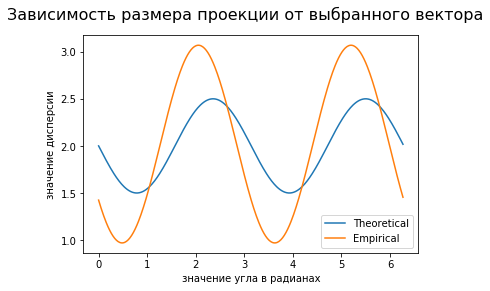

In [9]:
degrees360 = [2*np.math.pi/360*i for i in range(360)]
variances = []
var_emps = []
for i in degrees360:
    theta = i
    u = np.matrix('{}; {}'.format(np.math.sin(theta), np.math.cos(theta)))
    yp = y*u
    var_empirical = np.var(yp)
    var_theoretical = np.transpose(u)*c*u
    var_emps.append(var_empirical)
    variances.append(float(var_theoretical))

plt.suptitle('Зависимость размера проекции от выбранного вектора', fontsize=16)    
plt.xlabel('значение угла в радианах')
plt.ylabel('значение дисперсии')
plt.plot(degrees360, variances, label='Theoretical')
plt.plot(degrees360, var_emps, label='Empirical')
plt.legend()
plt.show()

# Работа с данными данные

Загрузить таблицу.

In [10]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url,index_col=0)

In [11]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [12]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [13]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(df[
    ['AveragePrice','Total Volume', '4046', '4225', '4770',
     'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']])
df_norm = pd.DataFrame(np_scaled, columns=['AveragePrice','Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags'])
print(df_norm[:5])

   AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0     -0.366548     -0.997947 -0.999909 -0.994680 -0.999962   -0.999102   
1     -0.352313     -0.998247 -0.999941 -0.995639 -0.999954   -0.999019   
2     -0.651246     -0.996220 -0.999930 -0.989336 -0.999898   -0.999159   
3     -0.544484     -0.997475 -0.999900 -0.992968 -0.999943   -0.999400   
4     -0.402135     -0.998370 -0.999917 -0.995717 -0.999940   -0.999362   

   Small Bags  Large Bags  XLarge Bags  
0   -0.998714   -0.999967         -1.0  
1   -0.998594   -0.999966         -1.0  
2   -0.998798   -0.999964         -1.0  
3   -0.999152   -0.999953         -1.0  
4   -0.999105   -0.999931         -1.0  


Построить корелляцию для всех типов авокадо (их там три). Построить графики histograms и плотность распределения (смотрим примеры из лекций).

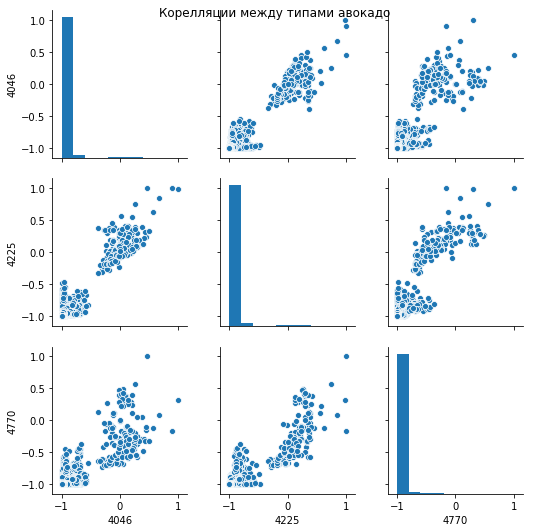

In [14]:
sns.pairplot(data=df_norm[['4046','4225','4770']])
plt.suptitle('Корелляции между типами авокадо')
plt.show()

Как пример, корелляциям между 'Total Volume' и 'Total Bags'

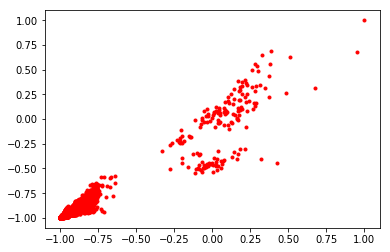

In [15]:
volume = df_norm['Total Volume']
bags = df_norm['Total Bags']
plt.plot(volume, bags, 'r.')

Посчитать матрицу ковариаций. Как из нее получить собственные вектора и собственные числа?

In [16]:
# посчитать ковариацию переменных (разброс относительно друг друга)
def cov(x, y):
    xbar, ybar = x.mean(), y.mean()
    return np.sum((x - xbar)*(y - ybar))/(len(x) - 1)

# матрица ковариаций
def cov_mat(X):
    return np.array([[cov(X[0], X[0]), cov(X[0], X[1])], \
                     [cov(X[1], X[0]), cov(X[1], X[1])]])

X = np.vstack((volume, bags))

# считаем матрицу ковариаций для вектора X
cov_mat(X.T) # (or with np.cov(X.T))

array([[6.66845471e-07, 4.45709407e-07],
       [4.45709407e-07, 2.97905413e-07]])

# Поиск собственного вектора

9.647508838714718e-07 [0.83139041 0.55568875]


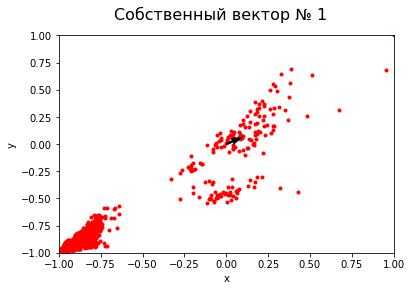

0.0 [-0.55568875  0.83139041]


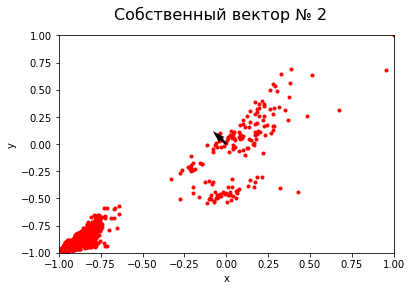

In [17]:
import numpy.linalg as la
n=1000
Cb = cov_mat(X.T)

w,v = la.eig(Cb)

for i in range(len(w)):
    plt.suptitle('Собственный вектор № '+ str(i+1), fontsize=16)    
    plt.plot(X[0,:], X[1,:], 'r.', zorder=1)
    plt.axis([-1,1,-1,1])
    print(w[i], v[:,i])
    plt.quiver(0,0, v[:,i][0], v[:,i][1], angles = 'xy', zorder=2)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

# Линейное преобразование значений (проекция на ось).

На какую прямую проецируем?

In [18]:
X1 = np.array([[2,1],[3,2]])
y1 = np.array([[1.5,1.5],[2.5,2.5]])
P = np.linalg.inv(X1).dot(y1)
P

array([[0.5, 0.5],
       [0.5, 0.5]])

Проецируем на прямую x=y. Матрицу P можно найти, задав вручную 2 точки из графика

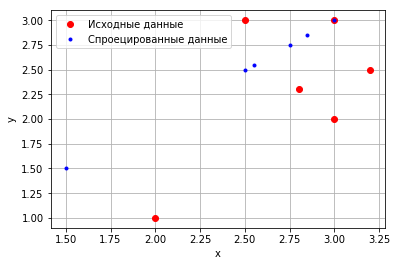

In [19]:
Xc = np.array([[2,1],[3,2],[3,3],[2.5,3],[2.8,2.3],[3.2,2.5]])
 # проецирование на какую прямую
P = [[0.5,0.5],[0.5,0.5]]
Xp = np.dot(Xc,P)

plt.plot(Xc[:,0], Xc[:,1], 'ro', label="Исходные данные")
plt.plot(Xp[:,0], Xp[:,1], 'b.', label="Спроецированные данные")
#plt.axis([0,4,0,4])
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()

# Теория вероятности
Напишите код для моделирования 100 подбрасываний игрального кубика. Начертите диаграму histogram.

In [20]:
import scipy.stats as sts
import matplotlib.pyplot as plt

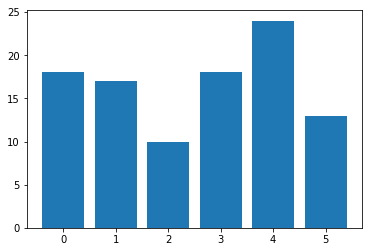

In [21]:
tosses = sts.randint.rvs(0,6, size=100)
xaxis = sorted(set(tosses))
yaxis = [(tosses==x).sum() for x in xaxis]
plt.bar(xaxis, yaxis) #histogram располагает столбцы немного неравномерно по оси x
plt.show()